In [1]:
from cv2 import imread,imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
I = imread("images/bird.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
imshow("bird",I)
cv2.waitKey(0)

-1

In [2]:
#converting image to float and normalizing
I = I.astype(np.float32)
I = I / 256
I.shape

(492, 640, 3)

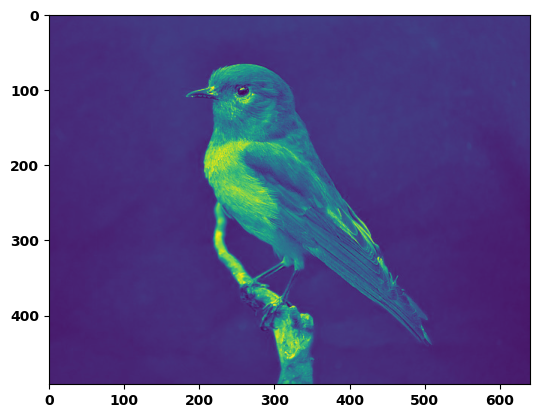

In [3]:
#only specific image channel
plt.imshow(I[:,:,0])

In [4]:
def to_greyscale(image_in):
    I = np.copy(image_in)
    I = I.astype("float32")
    return (I[:,:,0] + I[:,:,1] + I[:,:,2])/3

In [5]:
#converting image to grayscale
#averaging
I_gray = to_greyscale(I)
I_gray

array([[0.1171875 , 0.1171875 , 0.1171875 , ..., 0.14713542, 0.14713542,
        0.15104167],
       [0.1171875 , 0.1171875 , 0.1171875 , ..., 0.14322917, 0.14713542,
        0.14713542],
       [0.1171875 , 0.1171875 , 0.1171875 , ..., 0.14322917, 0.14322917,
        0.14713542],
       ...,
       [0.078125  , 0.078125  , 0.078125  , ..., 0.06510416, 0.06510416,
        0.06510416],
       [0.078125  , 0.078125  , 0.078125  , ..., 0.06119792, 0.06119792,
        0.06119792],
       [0.078125  , 0.078125  , 0.078125  , ..., 0.06119792, 0.06119792,
        0.05729167]], shape=(492, 640), dtype=float32)

In [6]:
#show gray image 
cv2.imshow("yes", I_gray)
cv2.waitKey(0)

-1

In [7]:
#showing only specific amount of the image
cv2.imshow("part", I_gray[120:360, 240:450])
cv2.waitKey(0)

-1

In [8]:
#function to invert part of the image
def invert_part_of_the_image(image_in, x1,x2,y1,y2):
    image = np.copy(image_in)
    image[x1:x2, y1:y2,:] = 255- image[x1:x2, y1:y2,:]
    return image

umbrellas = cv2.imread("images/umbrellas.jpg")
umbrellas_inverted = invert_part_of_the_image(umbrellas, 200,350,200,300)
cv2.imshow("inverted", umbrellas_inverted)
cv2.waitKey(0)

-1

In [9]:
# reduction of greyscale levels 
umbrellas_grey = to_greyscale(umbrellas)
umbrellas_grey = umbrellas_grey.astype("float32")
umbrellas_grey /= 255 
umbrellas_grey_03 = 0.3 * umbrellas_grey

cv2.imshow("umbrellas",umbrellas_grey)
cv2.imshow("second", umbrellas_grey_03)
cv2.waitKey(0)

-1

TRESHOLDING AND HISTOGRAMS

In [10]:
def create_binary_mask(image, treshold):
    gray_image = to_greyscale(image)
    mask = np.zeros(gray_image.shape)
    mask[gray_image > treshold] = 1
    return mask

bird = cv2.imread("images/bird.jpg")
bird = bird.astype("float32")
bird /= 255
mask =  create_binary_mask(bird, 0.4)
print(mask)
cv2.imshow("birdmask",mask)
cv2.waitKey(0)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


-1

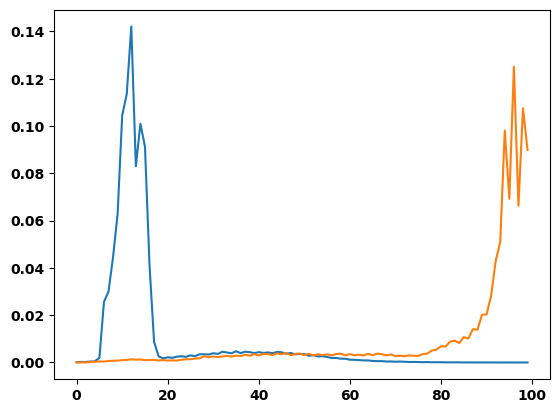

In [11]:
#with automatic tresholding 
def my_hist(gray_image, bins):
    min_image = min(gray_image.flatten())
    max_image = max(gray_image.flatten())

    img = gray_image.reshape(-1)
    hist = np.zeros(bins)
    for el in img:
        bin_current = np.ceil(bins * (el-min_image)/(max_image-min_image)) -1
        bin_current = bin_current.astype("int16")
        hist[bin_current] +=1
    hist /= len(img)
    return hist

bird = cv2.imread("images/bird.jpg")
plt.plot(my_hist(to_greyscale(bird), 100))
candy = cv2.imread("images/candy.jpg")
plt.plot(my_hist(to_greyscale(candy), 100))

In [12]:
def get_otsu_treshold(gray_image):
    vec = gray_image.flatten()
    med = np.median(vec).astype("int")
    T_return = med
    var_between_return = 0
    for T in range(med-50,med+50):
        group_1 = vec[vec > T]
        group_2 = vec[vec < T]
        avg_1 = np.mean(group_1)
        avg_2 = np.mean(group_2)
        var_between = len(group_1) * len(group_2) * (avg_1-avg_2)**2
        if var_between > var_between_return:
            var_between_return = var_between
            T_return = T

    return T_return 

bird = cv2.imread("images/bird.jpg")
tr = get_otsu_treshold(to_greyscale(bird))
mask = create_binary_mask(bird, tr)
cv2.imshow("mak",mask)
cv2.waitKey(0)


c:\Users\marko\miniconda3\envs\cv_basics\lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\marko\miniconda3\envs\cv_basics\lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


-1

In [16]:
#morphological operations and regions
I = mask
n = 5
SE = np.ones((n,n)) # create a square structuring element
I_eroded = cv2.erode(I, SE)
I_dilated = cv2.dilate(I, SE)
cv2.imshow("dsf", cv2.dilate(I_eroded, SE))
cv2.imshow("d", cv2.erode(I_dilated,SE))
cv2.waitKey(0)

-1